## Домашняя работа по базовой математической статистике для Data scientist

Задания со зведочкой не обязательны для зачета.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy import stats


df = pd.read_csv("bikeshare (2).csv")
del df['datetime']

In [ ]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### 1.
Постройте гистограмму распределения каждой из метрик в датасете при помощи метода датафрейма `hist()`. При необходимости добавьте логарифмированную ось (параметр log).

Text(0.5, 1.0, 'Распределение метрик в датасете')

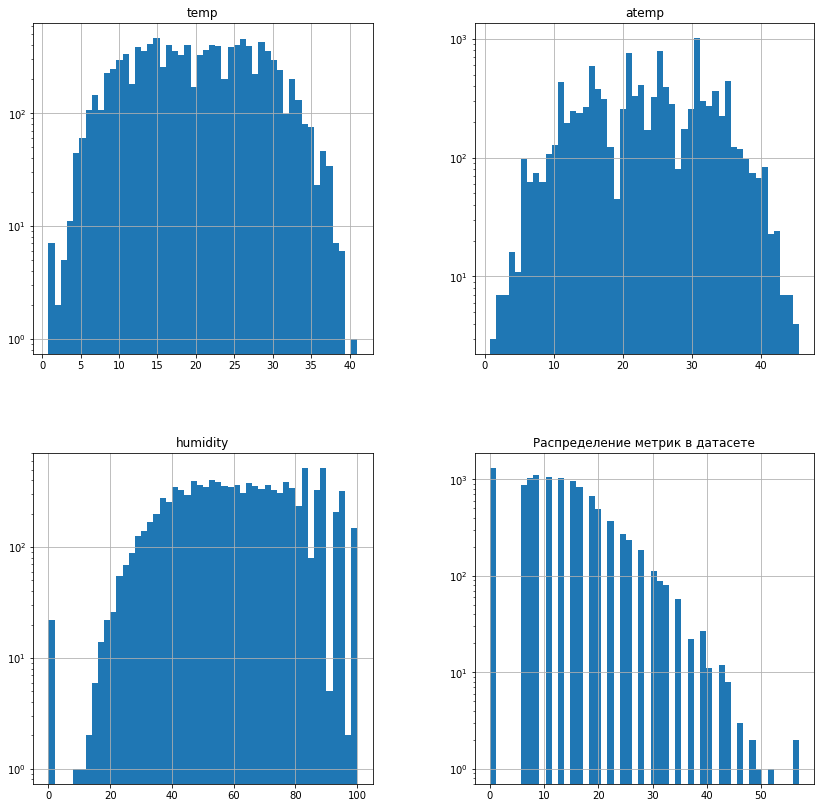

In [ ]:
dfw = df[['temp', 'atemp', 'humidity', 'windspeed']]
dfw.hist(figsize = (14,14),bins = 50, log = True)
plt.title("Распределение метрик в датасете")

### 2.
Для каждой метрики найдите среднее, дисперсию, 50, 75 и 99 перцентили, моду. Какие выводы о наличии аномалий мы можем сделать?

In [ ]:
def my_basic_research(df=dfw, column = ['temp', 'atemp', 'humidity', 'windspeed']):
    print("Базовые метрики")
    print(df[column].describe())
    print("------------------------------------")
    
    print("Самые популярные значения метрики, топ 5")
    print(df[column].value_counts().nlargest(5))
    print("------------------------------------")
    
    print("Эксцесс ", kurtosis(df[column]))
    print("Ассиметрия ", skew(df[column]))
    print("Медиана ", df[column].median())
    print("Дисперсия", np.var(df[column], ddof=1))
    
    plt.figure(figsize = (14,7))
    sns.boxplot(data=df[column])
    plt.title("Распределение прибыли по пользователям")

Базовые метрики
              temp         atemp      humidity     windspeed
count  10886.00000  10886.000000  10886.000000  10886.000000
mean      20.23086     23.655084     61.886460     12.799395
std        7.79159      8.474601     19.245033      8.164537
min        0.82000      0.760000      0.000000      0.000000
25%       13.94000     16.665000     47.000000      7.001500
50%       20.50000     24.240000     62.000000     12.998000
75%       26.24000     31.060000     77.000000     16.997900
max       41.00000     45.455000    100.000000     56.996900
------------------------------------
Самые популярные значения метрики, топ 5
temp   atemp   humidity  windspeed
14.76  17.425  93        8.9981       14
26.24  28.790  89        0.0000       14
16.40  20.455  87        0.0000       13
22.96  26.515  88        0.0000       13
18.86  22.725  88        0.0000       13
dtype: int64
------------------------------------
Эксцесс  [-0.91466138 -0.85023637 -0.76001971  0.62929237]
Ассиметр

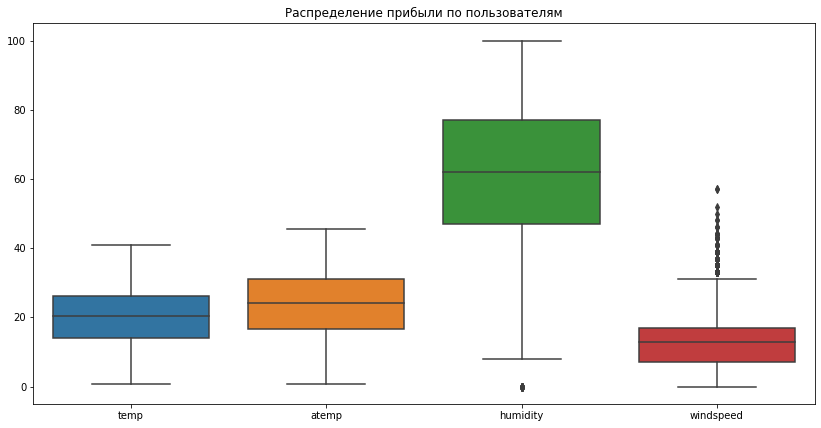

In [ ]:
my_basic_research()

Наибольшее количество аномалий у windspeed.

### 3. (*) 
 Для каждой метрики проанализируйте ассиметрию и смещенность распределения – для этого посчитайте для каждой метрики коэффициент ассиметрии и эксцесса.

In [ ]:
# Эксцесс
kurtosis(dfw)

array([-0.91466138, -0.85023637, -0.76001971,  0.62929237])

In [ ]:
# Ассиметрия
skew(dfw)

array([ 0.00369034, -0.10254538, -0.08632329,  0.5886854 ])

### 4.

Постройте симметричный доверительный интервал для метрики с самой большой дисперсией при доверительной вероятности 0.95. 

In [ ]:
# дисперсия 
np.var(dfw, ddof=1)

temp          60.708872
atemp         71.818856
humidity     370.371306
windspeed     66.659670
dtype: float64

Text(0.5, 1.0, 'График параментра с самой большой дисперсией-humidity')

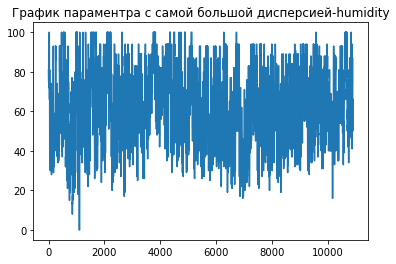

In [ ]:
dfw.humidity.plot()
plt.title("График параментра с самой большой дисперсией-humidity")

In [ ]:
def my_basic_research(df=dfw, column = "humidity"):
    print("Базовые метрики")
    print(df[column].describe())
    print("------------------------------------")
    
    print("Самые популярные значения метрики, топ 5")
    print(df[column].value_counts().nlargest(5))
    print("------------------------------------")
    
    print("Эксцесс ", kurtosis(df[column]))
    print("Ассиметрия ", skew(df[column]))
    
    sns.distplot(df[column])
    plt.title("Распределение прибыли по пользователям")

Базовые метрики
count    10886.000000
mean        61.886460
std         19.245033
min          0.000000
25%         47.000000
50%         62.000000
75%         77.000000
max        100.000000
Name: humidity, dtype: float64
------------------------------------
Самые популярные значения метрики, топ 5
88    368
94    324
83    316
87    289
70    259
Name: humidity, dtype: int64
------------------------------------
Эксцесс  -0.760019710012902
Ассиметрия  -0.0863232869219358


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


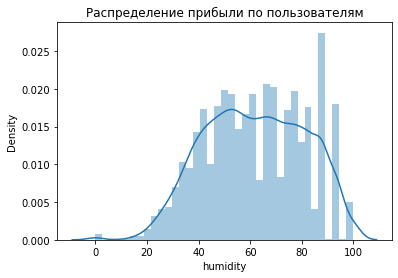

In [ ]:
my_basic_research()

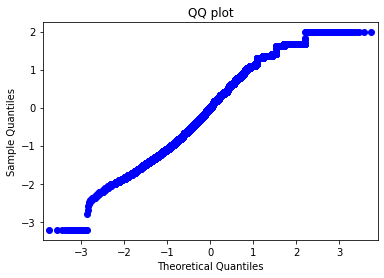

In [ ]:
import statsmodels.api as sm
sm.qqplot(dfw.humidity, fit = True)
plt.title("QQ plot")
plt.show()

In [ ]:
def my_norm_confidence(df=dfw, column = "humidity", alpha = 0.95):
    interval = stats.norm.interval(alpha, loc=df[column].mean(), scale=df[column].std())
    return interval

In [ ]:
confidence = my_norm_confidence()
print(confidence)

(24.16688756800584, 99.60603177794309)


Text(0.5, 1.0, 'Доверительный интервал')

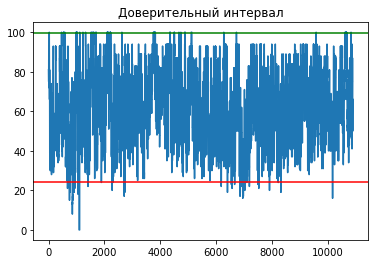

In [ ]:
dfw.humidity.plot()
plt.axhline(y=confidence[1], color="g", linestyle="-")
plt.axhline(y=confidence[0], color="r", linestyle="-")
plt.title("Доверительный интервал")

### 5. (*)

Найдите количество значений, выходящих за три сигмы для каждой из метрик. Где получилось больше всего аномалий?

-3.1439097120103447 43.605629351914686


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '3 sigma и 99 квантиль для нормального распределения по temp')

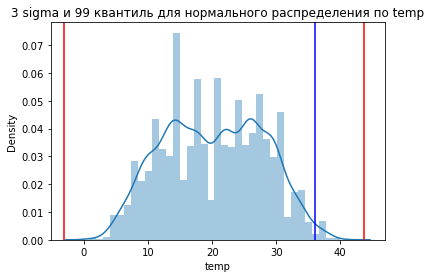

In [ ]:
upper_level = dfw.temp.mean() + 3*dfw.temp.std()
lower_level = dfw.temp.mean() - 3*dfw.temp.std()
print(lower_level,upper_level)
level_99 = np.percentile(dfw.temp, 99)
sns.distplot(dfw.temp)
plt.axvline(x=lower_level, color="r", linestyle="-")
plt.axvline(x=upper_level, color="r", linestyle="-")
plt.axvline(x=level_99, color="b", linestyle="-")
plt.title("3 sigma и 99 квантиль для нормального распределения по temp")

-1.7687178265427441 49.07888593236659


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '3 sigma и 99 квантиль для нормального распределения по atemp')

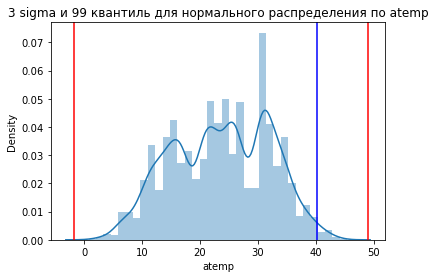

In [ ]:
upper_level = dfw.atemp.mean() + 3*dfw.atemp.std()
lower_level = dfw.atemp.mean() - 3*dfw.atemp.std()
print(lower_level,upper_level)
level_99 = np.percentile(dfw.atemp, 99)
sns.distplot(dfw.atemp)
plt.axvline(x=lower_level, color="r", linestyle="-")
plt.axvline(x=upper_level, color="r", linestyle="-")
plt.axvline(x=level_99, color="b", linestyle="-")
plt.title("3 sigma и 99 квантиль для нормального распределения по atemp")

4.1513598407901 119.62155950515881


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '3 sigma и 99 квантиль для нормального распределения по humidity')

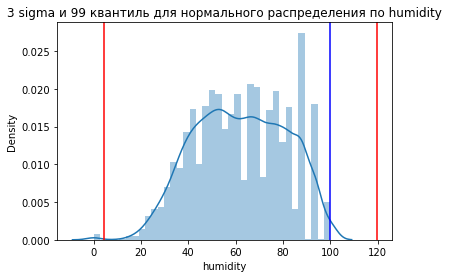

In [ ]:
upper_level = dfw.humidity.mean() + 3*dfw.humidity.std()
lower_level = dfw.humidity.mean() - 3*dfw.humidity.std()
print(lower_level,upper_level)
level_99 = np.percentile(dfw.humidity,99)
sns.distplot(dfw.humidity)
plt.axvline(x=lower_level, color="r", linestyle="-")
plt.axvline(x=upper_level, color="r", linestyle="-")
plt.axvline(x=level_99, color="b", linestyle="-")
plt.title("3 sigma и 99 квантиль для нормального распределения по humidity")

-11.694216573570374 37.29300738746056


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '3 sigma и 99 квантиль для нормального распределения по windspeed')

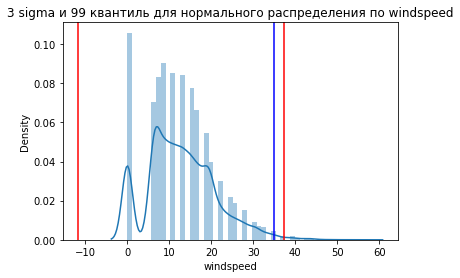

In [ ]:
upper_level = dfw.windspeed.mean() + 3*dfw.windspeed.std()
lower_level = dfw.windspeed.mean() - 3*dfw.windspeed.std()
print(lower_level,upper_level)
level_99 = np.percentile(dfw.windspeed,99)
sns.distplot(dfw.windspeed)
plt.axvline(x=lower_level, color="r", linestyle="-")
plt.axvline(x=upper_level, color="r", linestyle="-")
plt.axvline(x=level_99, color="b", linestyle="-")
plt.title("3 sigma и 99 квантиль для нормального распределения по windspeed")

In [ ]:
Судя по графикам, большее всего аномалий у temp и atemp.

### 6.

Постройте корреляционную матрицу и heatmap по метрикам. Какие выводы о наличии связей можно сделать?

In [ ]:
corr_m = dfw.corr()
corr_m

,temp,atemp,humidity,windspeed
temp,1.000000,0.984948,-0.064949,-0.017852
atemp,0.984948,1.000000,-0.043536,-0.057473
humidity,-0.064949,-0.043536,1.000000,-0.318607
windspeed,-0.017852,-0.057473,-0.318607,1.000000


<AxesSubplot:>

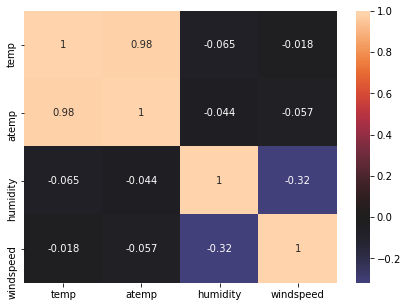

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(corr_m, center=0, annot=True)

Показатели temp и atemp тесно связаны друг с другом.